<a href="https://colab.research.google.com/github/rahul-rajendra-kumar/Machine_Learning/blob/main/ANN_with_Wine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [ ]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
print(white.head())
print(red.head())
print(white.tail())
print(red.tail())
print(white.sample(5))
print(red.sample(5))

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4   

In [ ]:
print(white.info())
print(red.info())
print(white.describe())
print(red.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

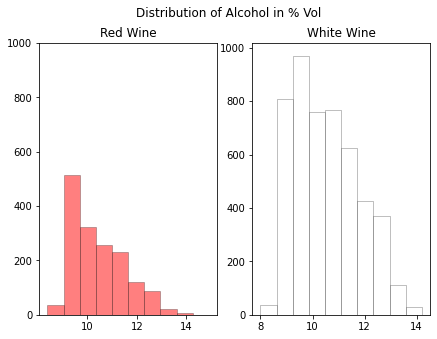

In [ ]:
f = plt.figure(figsize=(7,5))
ax[0] = f.add_subplot(1, 2, 1)
ax[0].set_title('Red Wine')
ax[1] = f.add_subplot(1, 2, 2)
ax[1].set_title('White Wine')
ax[0].hist(red.alcohol, 10, facecolor = 'red', ec = "black", lw = 0.5, alpha = 0.5, label = "Red Wine")
ax[1].hist(white.alcohol, 10, facecolor = 'white', ec = "black", lw = 0.5, alpha = 0.5, label = "White Wine")
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0,1000])
f.suptitle("Distribution of Alcohol in % Vol")
plt.show()

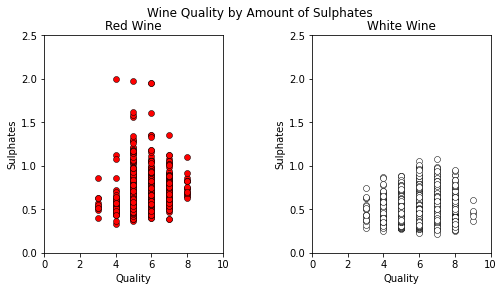

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red", edgecolors="black", lw=0.5)
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

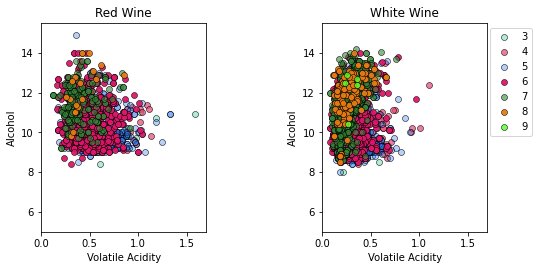

In [ ]:
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i], edgecolors="black", lw=0.5)
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i], edgecolors="black", lw=0.5)
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

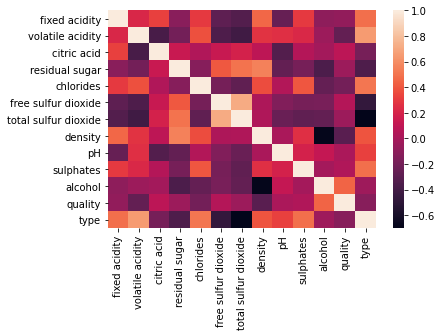

In [ ]:
red["type"] = 1
white["type"] = 0
wines = red.append(white, ignore_index=True)
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [ ]:
x = wines.iloc[:,0:11]
y = np.ravel(wines["type"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(4352, 11)

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.output_shape)
print(model.get_config())
# print(model.get_weights())
model.summary()

(None, 1)
{'name': 'sequential_5', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 11), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_15_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_15', 'trainable': True, 'batch_input_shape': (None, 11), 'dtype': 'float32', 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_16', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, '

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.2314 - accuracy: 0.8982
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0183 - accuracy: 0.9974
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0201 - accuracy: 0.9958
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0119 - accuracy: 0.9969
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0159 - accuracy: 0.9959
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0134 - accuracy: 0.9973
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0097 - accuracy: 0.9982
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0137 - accuracy: 0.9977
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0159 - accuracy: 0.9964
Epoch 10/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.015

In [ ]:
y_pred = model.predict(x_test)
y_pred = [int(y) for y in y_pred]

score = model.evaluate(x_test, y_test,verbose=1)
print("Model Score: ", score)
print("Confusion Matrix: ","\n", confusion_matrix(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Recall Score: ", f1_score(y_test,y_pred))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test, y_pred))

68/68 [==============================] - 0s 937us/step - loss: 0.0279 - accuracy: 0.9953
Model Score:  [0.02789323963224888, 0.9953380227088928]
Confusion Matrix:  
 [[1588    0]
 [ 111  446]]
Precision Score:  1.0
Recall Score:  0.800718132854578
Recall Score:  0.8893320039880359
Cohen Kappa Score:  0.856100389763996
